In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [23]:
df = pd.read_csv('./data/labelled_reviews.csv', converters={'reviews': pd.eval})
df.head()

,trip_verification,reviews,num_words,review_sentence,Scores,Compound,sentiment
0,False,"[I, travel, British, Airways, Sweden, Los, Ang...",196,I travel British Airways Sweden Los Angeles Lo...,"{'neg': 0.094, 'neu': 0.858, 'pos': 0.048, 'co...",-0.8573,Negative
1,False,"[Food, lousy., Who, plan, Asian, Hindu, Vegeta...",54,Food lousy. Who plan Asian Hindu Vegetarian me...,"{'neg': 0.187, 'neu': 0.664, 'pos': 0.149, 'co...",-0.5574,Negative
2,True,"[Had, worst, experience., The, flight, London,...",59,Had worst experience. The flight London Toront...,"{'neg': 0.174, 'neu': 0.745, 'pos': 0.082, 'co...",-0.6486,Negative
3,True,"[The, grind, staff, helpful., Felt, like, want...",32,The grind staff helpful. Felt like want rush c...,"{'neg': 0.113, 'neu': 0.65, 'pos': 0.237, 'com...",0.6124,Positive
4,True,"[Second, time, BA, Premium, Economy, newer, ai...",50,Second time BA Premium Economy newer aircraft ...,"{'neg': 0.048, 'neu': 0.562, 'pos': 0.391, 'co...",0.9713,Positive


In [40]:
df['review_sentence'].iloc[0]

'I travel British Airways Sweden Los Angeles London December 2022. When I arrive LAX bag missing. There information whereabouts bag search 30 minutes, I find point contact tell bag leave behind. I give detail I stay tell contact me. After day contact I try British Airways customer service. The woman airport didn’t file reference number, difficult try locate bag, finally find reference number bag say deliver couple days. I tell I switch hotel give address I stay fine. But couple week go bag see time fly home. At airport I try talk personnel try locate bag say deliver hotel I stay at, I give update address. I ask I I fly home now. The guy counter tell wasn’t problem I figure myself. I question response walk away. A manager saw come apologize colleague send fetch bag send flight one. I come home couple day later I receive bag. I complaint claim British Airways website I buy clothe toiletry vacation I didn’t bag. In January say refund claims, April (almost May) I receive refund multiple em

<Axes: xlabel='sentiment', ylabel='count'>

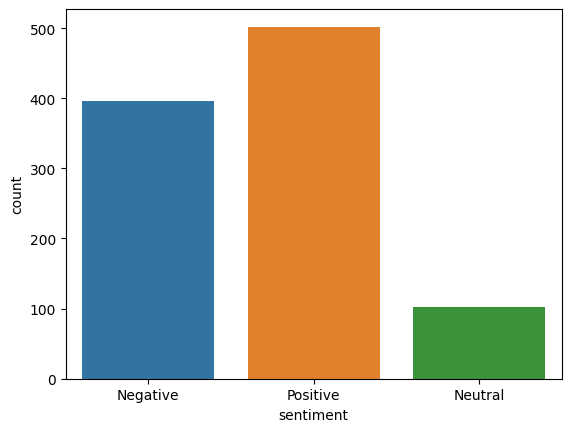

In [24]:
sns.countplot(x = df['sentiment'], data = df)

<Axes: xlabel='number of words', ylabel='Frequency'>

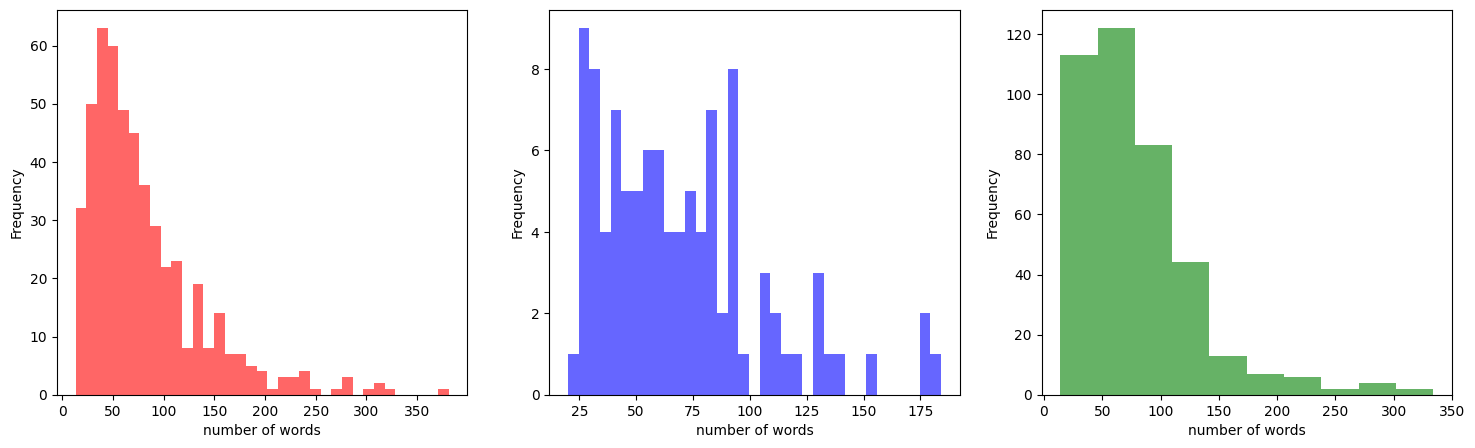

In [44]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
plt.xlabel('number of words')
plt.ylabel('number of reviews')
df[df.sentiment == 'Positive'].num_words.plot(bins=35, kind='hist', color='red', label='positive', alpha=0.6)
plt.subplot(1,3,2)

plt.xlabel('number of words')
df[df.sentiment == 'Neutral'].num_words.plot(bins=35, kind='hist', color='blue', label='neutral', alpha=0.6)
plt.subplot(1,3,3)

plt.xlabel('number of words')
df[df.sentiment == 'Negative'].num_words.plot(kind='hist', color='green', label='negative', alpha=0.6)

In [26]:
positive_review  = df[df['sentiment'] == 'Positive']
negative_review = df[df['sentiment'] == 'Negative']
neutral_review = df[df['sentiment'] == 'Neutral']

In [45]:
print(positive_review.shape,'positive_review_shape')
print(negative_review.shape,'negative_review_shape')
print(neutral_review.shape, 'neutral_review_shape')

(502, 7) positive_review_shape
(396, 7) negative_review_shape
(102, 7) neutral_review_shape


In [27]:
positive_review_words = [review for review in positive_review['review_sentence']]
negative_review_words = [review for review in negative_review['review_sentence']]
neutral_review_words = [review for review in neutral_review['review_sentence']]

positive_review_words = ' '.join(positive_review_words)
negative_review_words = ' '.join(negative_review_words)
neutral_review_words = ' '.join(neutral_review_words)


In [28]:
positive_review

,trip_verification,reviews,num_words,review_sentence,Scores,Compound,sentiment
3,True,"[The, grind, staff, helpful., Felt, like, want...",32,The grind staff helpful. Felt like want rush c...,"{'neg': 0.113, 'neu': 0.65, 'pos': 0.237, 'com...",0.6124,Positive
4,True,"[Second, time, BA, Premium, Economy, newer, ai...",50,Second time BA Premium Economy newer aircraft ...,"{'neg': 0.048, 'neu': 0.562, 'pos': 0.391, 'co...",0.9713,Positive
9,True,"[LHR, check, quick, First, Wing, quickly, secu...",172,LHR check quick First Wing quickly security. T...,"{'neg': 0.116, 'neu': 0.725, 'pos': 0.158, 'co...",0.8578,Positive
15,True,"[I, enjoy, flight., The, board, swift, service...",41,I enjoy flight. The board swift service friend...,"{'neg': 0.071, 'neu': 0.588, 'pos': 0.341, 'co...",0.9231,Positive
19,True,"[I, swear, I, fly, BA, mess, try, Budapest., B...",48,I swear I fly BA mess try Budapest. But time f...,"{'neg': 0.067, 'neu': 0.561, 'pos': 0.373, 'co...",0.9723,Positive
...,...,...,...,...,...,...,...
995,True,"[Mumbai, London, Heathrow., Disappointing, exp...",99,Mumbai London Heathrow. Disappointing experien...,"{'neg': 0.144, 'neu': 0.613, 'pos': 0.243, 'co...",0.8891,Positive
996,True,"[Delhi, London., Having, read, negative, revie...",117,Delhi London. Having read negative review Brit...,"{'neg': 0.109, 'neu': 0.625, 'pos': 0.267, 'co...",0.9614,Positive
997,True,"[When, travel, British, Airways, like, lucky, ...",130,When travel British Airways like lucky able Br...,"{'neg': 0.084, 'neu': 0.673, 'pos': 0.243, 'co...",0.9785,Positive
998,True,"[British, Airways, get, plenty, deserve, kick,...",36,British Airways get plenty deserve kick return...,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",0.9423,Positive


In [29]:
from nltk.probability import FreqDist
import nltk



In [30]:
tokens_positive = positive_review['review_sentence'].str.lower().apply(nltk.word_tokenize).sum()
fdist_positive = FreqDist(tokens_positive)

for e in ['.','the',',','ba','and','i','flight','from','to','we','\'','’','it','(',')']:
    fdist_positive.pop(e)


In [31]:
tokens_negative = negative_review['review_sentence'].str.lower().apply(nltk.word_tokenize).sum()
fdist_negative = FreqDist(tokens_negative)
for e in ['.','the',',','ba','and','i','flight','from','to','we','\'','’','it','(',')']:
    fdist_negative.pop(e)

In [32]:
print('common postive words')
print(fdist_positive.most_common(30))
print('common negative words')
print(fdist_negative.most_common(30))

common postive words
[('seat', 506), ('service', 393), ('good', 373), ('crew', 338), ('time', 331), ('london', 313), ('food', 308), ('cabin', 269), ('class', 217), ('staff', 215), ('board', 211), ('fly', 205), ('business', 200), ('hour', 190), ('-', 171), ('british', 170), ('economy', 169), ('check', 168), ('airways', 161), ('heathrow', 158), ("n't", 157), ('!', 156), ('lounge', 154), ('experience', 151), ('drink', 144), ('club', 142), ('offer', 142), ('great', 135), ('meal', 133), ('new', 127)]
common negative words
[('seat', 327), ('service', 288), ('london', 265), ('hour', 226), ('fly', 186), ('time', 185), ('british', 173), ('book', 172), ('airways', 168), ('class', 165), ('tell', 159), ('airline', 159), ('customer', 155), ('staff', 155), ('pay', 147), ('day', 146), ('business', 145), ('-', 145), ('delay', 142), ('food', 141), ('cancel', 136), ('heathrow', 133), ("n't", 130), ('t', 124), ('say', 122), ('crew', 120), ('airport', 119), ('check', 118), ('offer', 114), ('get', 113)]


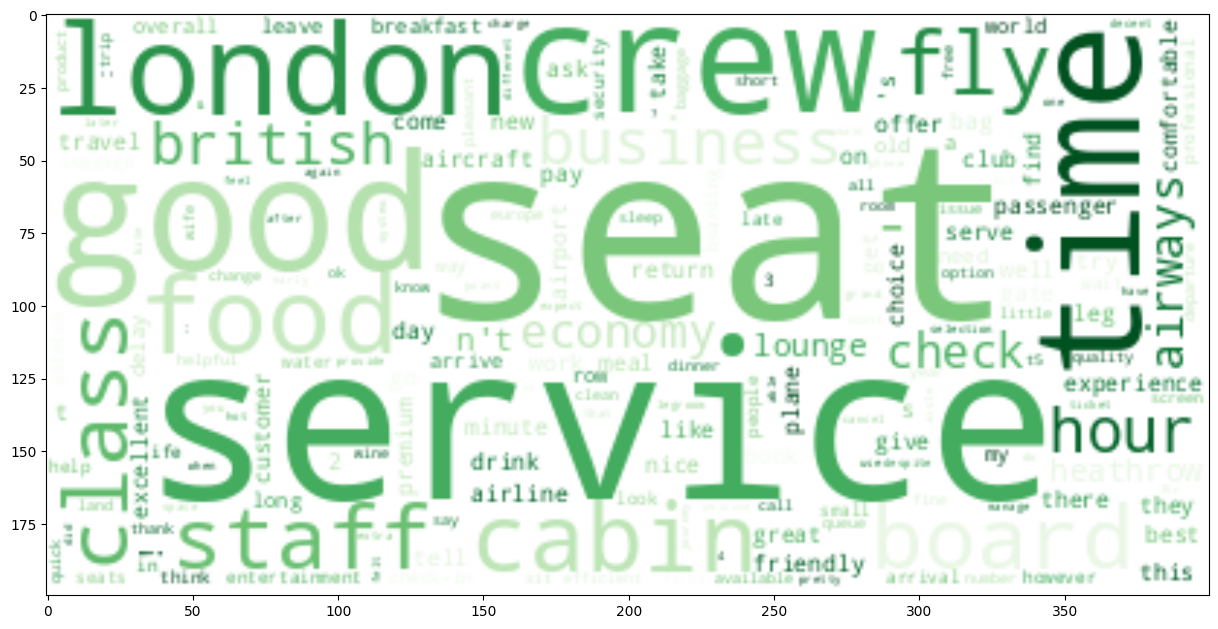

In [33]:
newwc = WordCloud(background_color='white', max_words = len(positive_review_words), colormap='Greens')
newwc.generate_from_frequencies(fdist_positive)
plt.figure(figsize=(15, 15))
plt.imshow(newwc, interpolation='bilinear')
plt.show()

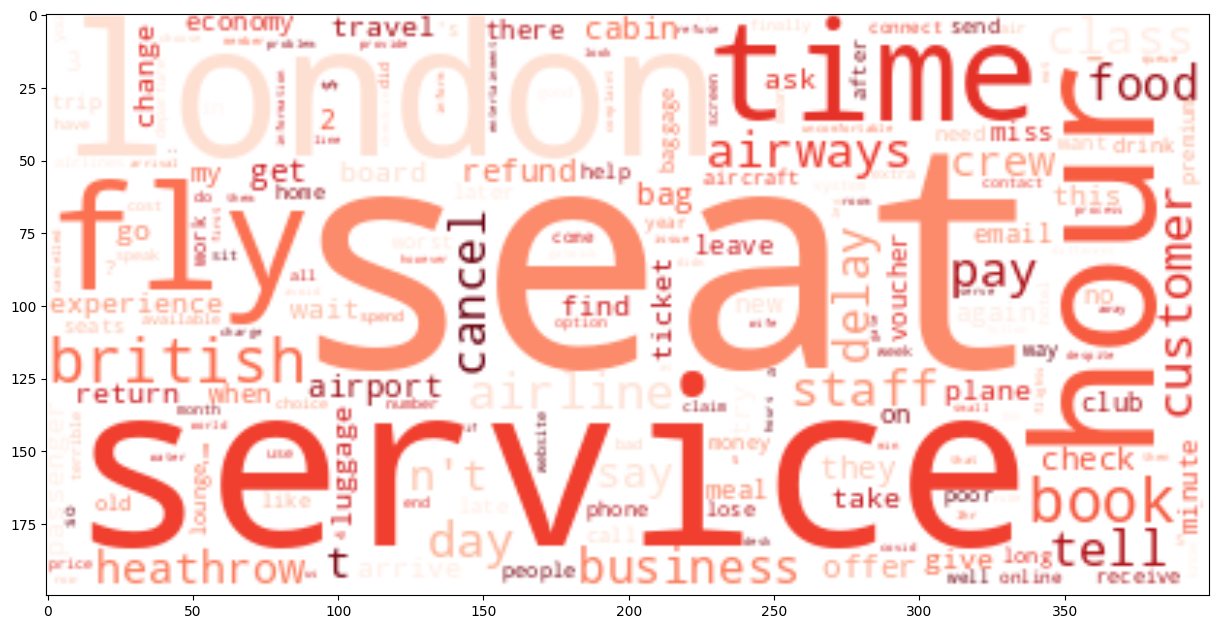

In [34]:
newwc = WordCloud(background_color='white', max_words = len(negative_review_words), colormap='Reds')
newwc.generate_from_frequencies(fdist_negative)
plt.figure(figsize=(15, 15))
plt.imshow(newwc, interpolation='bilinear')
plt.show()

In [35]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim import corpora


In [52]:
dictionary = corpora.Dictionary(positive_review['reviews'])

# Convert preprocessed data to bag of words corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in positive_review['reviews']]

# Train LDA model on bag of words corpus
num_topics = 10
lda_model = gensim.models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20)

# Print topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"flight" + 0.011*"I" + 0.010*"BA" + 0.007*"The" + 0.006*"time" + 0.006*"crew" + 0.006*"food" + 0.006*"service" + 0.005*"minute" + 0.004*"staff"
Topic: 1 
Words: 0.047*"I" + 0.014*"BA" + 0.013*"flight" + 0.013*"The" + 0.012*"seat" + 0.007*"fly" + 0.006*"time" + 0.006*"hour" + 0.006*"crew" + 0.005*"business"
Topic: 2 
Words: 0.019*"I" + 0.017*"The" + 0.011*"seat" + 0.010*"crew" + 0.009*"service" + 0.008*"flight" + 0.007*"BA" + 0.007*"cabin" + 0.006*"economy" + 0.006*"board"
Topic: 3 
Words: 0.015*"I" + 0.012*"seat" + 0.012*"BA" + 0.010*"The" + 0.009*"business" + 0.007*"class" + 0.007*"London" + 0.006*"food" + 0.006*"fly" + 0.005*"flight"
Topic: 4 
Words: 0.020*"The" + 0.015*"flight" + 0.012*"seat" + 0.010*"I" + 0.009*"good" + 0.008*"service" + 0.008*"time" + 0.008*"cabin" + 0.007*"crew" + 0.006*"drink"
Topic: 5 
Words: 0.032*"I" + 0.023*"flight" + 0.014*"The" + 0.006*"BA" + 0.006*"-" + 0.005*"Airways" + 0.005*"British" + 0.005*"We" + 0.005*"get" + 0.005*"board"
Top

In [53]:
import re
temp = []
temp2_pos = []
for idx, topic in lda_model.print_topics(-1):
    temp.append(re.findall('"([^"]*)"', topic))
for i in temp:
    temp2_pos.append(' '.join(i))
temp2_pos

['flight I BA The time crew food service minute staff',
 'I BA flight The seat fly time hour crew business',
 'I The seat crew service flight BA cabin economy board',
 'I seat BA The business class London food fly flight',
 'The flight seat I good service time cabin crew drink',
 'I flight The BA - Airways British We get board',
 'flight The I crew BA seat good London food Heathrow',
 'I flight The BA board good crew food service cabin',
 'I flight The BA seat British service London check find',
 'The I seat flight British meal BA hour staff serve']

In [54]:
dictionary = corpora.Dictionary(negative_review['reviews'])

# Convert preprocessed data to bag of words corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in negative_review['reviews']]

# Train LDA model on bag of words corpus
num_topics = 10
lda_model = gensim.models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20)

# Print topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.032*"I" + 0.018*"flight" + 0.011*"The" + 0.011*"seat" + 0.010*"BA" + 0.007*"hour" + 0.006*"London" + 0.006*"service" + 0.006*"class" + 0.005*"business"
Topic: 1 
Words: 0.017*"I" + 0.013*"seat" + 0.009*"BA" + 0.009*"The" + 0.007*"service" + 0.007*"flight" + 0.007*"British" + 0.006*"Airways" + 0.005*"airline" + 0.004*"Club"
Topic: 2 
Words: 0.017*"I" + 0.014*"flight" + 0.013*"The" + 0.012*"seat" + 0.008*"BA" + 0.006*"-" + 0.006*"fly" + 0.005*"crew" + 0.005*"We" + 0.005*"board"
Topic: 3 
Words: 0.024*"I" + 0.014*"flight" + 0.013*"BA" + 0.009*"The" + 0.008*"London" + 0.008*"seat" + 0.006*"cancel" + 0.006*"hour" + 0.006*"British" + 0.005*"service"
Topic: 4 
Words: 0.083*"I" + 0.019*"flight" + 0.011*"tell" + 0.010*"BA" + 0.008*"day" + 0.007*"cancel" + 0.007*"bag" + 0.007*"say" + 0.007*"customer" + 0.007*"British"
Topic: 5 
Words: 0.015*"BA" + 0.010*"flight" + 0.008*"Heathrow" + 0.008*"staff" + 0.007*"service" + 0.007*"hour" + 0.005*"cabin" + 0.004*"I" + 0.004*"Club" + 0.0

In [55]:
import re
temp = []
temp2_neg = []
for idx, topic in lda_model.print_topics(-1):
    temp.append(re.findall('"([^"]*)"', topic))
for i in temp:
    temp2_neg.append(' '.join(i))

temp2_neg

['I flight The seat BA hour London service class business',
 'I seat BA The service flight British Airways airline Club',
 'I flight The seat BA - fly crew We board',
 'I flight BA The London seat cancel hour British service',
 'I flight tell BA day cancel bag say customer British',
 'BA flight Heathrow staff service hour cabin I Club late',
 'The flight I BA - London hour We staff offer',
 'seat flight I BA The hour fly business pay book',
 'I flight BA The book service fly customer hour refund',
 'I flight BA The book hour seat cancel time voucher']

In [56]:
positive_review.describe()

,num_words,Compound
count,502.000000,502.000000
mean,80.912351,0.871427
std,56.679231,0.131803
min,13.000000,0.506000
25%,42.000000,0.803050
50%,65.000000,0.928700
75%,102.750000,0.970075
max,381.000000,0.999300


In [57]:
negative_review.describe()

,num_words,Compound
count,396.000000,396.000000
mean,77.598485,-0.641226
std,51.186063,0.271145
min,14.000000,-0.992600
25%,41.000000,-0.866350
50%,64.500000,-0.718100
75%,99.000000,-0.455900
max,334.000000,0.000000
